# Vectorized operations in pandas

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [10]:
# First create a fake dataset

df = pd.DataFrame({'x': np.random.uniform(1000000), 'y': np.random.normal(size=1000000)})
df.head()

,x,y
0,891238.320715,0.558623
1,891238.320715,-0.709863
2,891238.320715,-0.810829
3,891238.320715,0.862494
4,891238.320715,0.787012


In [11]:
def collect(label, time, d):
    print(label, ':', time)
    d[label] = time
    return d

In [12]:
n = 100
rec = {}

tic = time.time()
for i in range(n):
    d = df.copy()
copytime = time.time()-tic
rec = collect("Basic copying", copytime, rec)

tic = time.time()
for i in range(n):
    d = d.copy()
    d['z'] = d.x-d.y
rec = collect("d['z'] = d.x-d.y", time.time()-tic-copytime, rec)

tic = time.time()
for i in range(n):
    d = df.copy()
    d.loc[:,'z'] = d.x-d.y
rec = collect("d.loc[:,'z'] = d.x-d.y", time.time()-tic-copytime, rec)


tic = time.time()
for i in range(n):
    d = df.copy()
    d = d.assign(z=d.x-d.y)
rec = collect("d = d.assign(z=d.x-d.y)", time.time()-tic-copytime, rec)

tic = time.time()
for i in range(n):
    d = df.copy()
    d.insert(2, 'z', d.x-d.y)
rec = collect("d.insert(2, 'z', d.x-d.y)", time.time()-tic-copytime, rec)

tic = time.time()
for i in range(n):
    d = df.copy()
    d.eval('z=x-y', inplace=True)
rec = collect("d.eval('z=x-y', inplace=True)", time.time()-tic-copytime, rec)

tic = time.time()
for i in range(n):
    d = df.copy()
    d = d.eval('z=x-y', inplace=False)
rec = collect("d = d.eval('z=x-y', inplace=False)", time.time()-tic-copytime, rec)

Basic copying : 0.5645139217376709
d['z'] = d.x-d.y : 0.9633402824401855
d.loc[:,'z'] = d.x-d.y : 2.773918628692627
d = d.assign(z=d.x-d.y) : 1.2119276523590088
d.insert(2, 'z', d.x-d.y) : 0.690643310546875
d.eval('z=x-y', inplace=True) : 1.6492609977722168
d = d.eval('z=x-y', inplace=False) : 2.1888341903686523


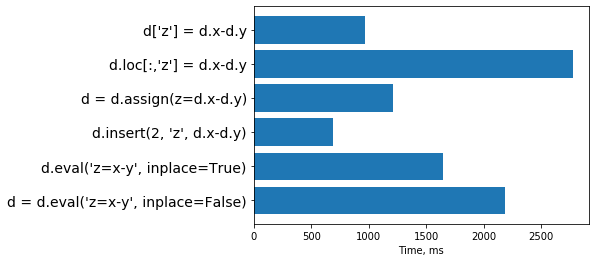

In [13]:
x,y = zip(*[(key,val) for key,val in rec.items()][1:])
_,ax = plt.subplots()
plt.barh(x, np.array(y)*1000);
plt.xlabel('Time, ms');
plt.yticks(fontsize=14)
ax.invert_yaxis();